Automatically created module for IPython interactive environment
('Coefficients: \n', array([ 938.23786125]))
Residual sum of squares: 2548.07
Residual sum of squares of train data: 3955.02
Variance score of test data (original): 0.47
Variance score of train data: 0.34


/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


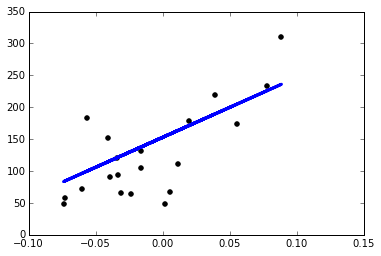

In [1]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
#print diabetes.data

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
#print ("XXXXXXXXXXXXXXXXXXxxx",len(diabetes_X))

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
print("Residual sum of squares of train data: %.2f"
      % np.mean((regr.predict(diabetes_X_train) - diabetes_y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score of test data (original): %.2f' % regr.score(diabetes_X_test, diabetes_y_test))
print('Variance score of train data: %.2f' % regr.score(diabetes_X_train, diabetes_y_train))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

1000


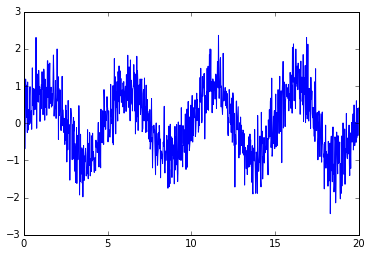

In [2]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size)
print (sig.size)
plt.plot(time_vec, sig)
plt.show()
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

[]

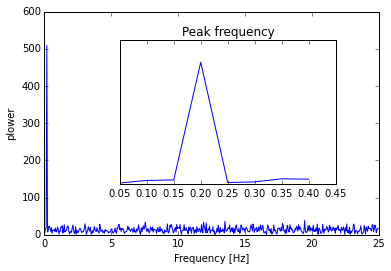

In [3]:
import numpy as np
from scipy import fftpack
import pylab as pl


np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)
#plt.scatter(time_vec, sig)
#plt.show()
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

#plt.scatter(time_vec, sample_freq)
#plt.show()
sig_fft = fftpack.fft(sig)
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]

pl.figure()
pl.plot(freqs, power)
pl.xlabel('Frequency [Hz]')
pl.ylabel('plower')
axes = pl.axes([0.3, 0.3, 0.5, 0.5])
pl.title('Peak frequency')
pl.plot(freqs[:8], power[:8])
pl.setp(axes, yticks=[])

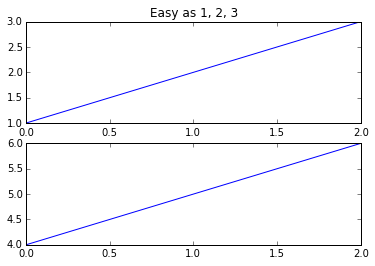

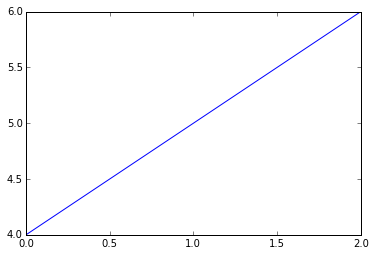

In [4]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

/home/ubuntu/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


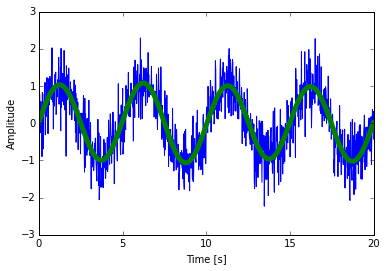

In [5]:
import numpy as np
from scipy import fftpack
import pylab as pl

np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)

sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]

sig_fft[np.abs(sample_freq) > freq] = 0
main_sig = fftpack.ifft(sig_fft)

pl.figure()
pl.plot(time_vec, sig)
pl.plot(time_vec, main_sig, linewidth=5)
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')

In [6]:
"""
Discover the periods in ../../data/populations.txt
"""
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('../../data/populations.txt')
years = data[:, 0]
populations = data[:, 1:]

ft_populations = np.fft.fft(populations, axis=0)
frequencies = np.fft.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.show()

# There's probably a period of around 10 years (obvious from the
# plot), but for this crude a method, there's not enough data to say
# much more.

IOError: [Errno 2] No such file or directory: '../../data/populations.txt'

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
def f(x):
    return x**2 + 10*np.sin(x)


grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_local = optimize.fminbound(f, 0, 10)
root = optimize.fsolve(f, 1)  # our initial guess is 1
root2 = optimize.fsolve(f, -2.5)

xdata = np.linspace(-10, 10, num=20)
np.random.seed(1234)
ydata = f(xdata) + np.random.randn(xdata.size)

def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
ax.plot(x, f2(x, *params), 'r--', label="Curve fit result")
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')


In [ ]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print arr.mean(0)
print arr.mean(1)
max_temp=np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_temp=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
max_max=np.max(max_temp)
min_min=np.min(min_temp)
print max_max, min_min
x=np.arange(0,12,1)
plt.plot (x, max_temp, x, min_temp)
plt.plot (np.argmax(max_temp), np.max(max_temp), "bo", label="Highest_Temp")
plt.legend()

[0 0]
[[-2  2]
 [-1  1]]
('Xmin_global2=', array([ 0.08987895, -0.71264108]))
   status: 0
  success: True
     nfev: 3
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      fun: 0.0
        x: array([ 0.,  0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
      jac: array([  4.00000000e-08,  -4.00000000e-08])
      nit: 0
[ 0.  0.]
hello
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 4
         Gradient evaluations: 1
SOL_BFGS Results %r [0 0]
[0 0]


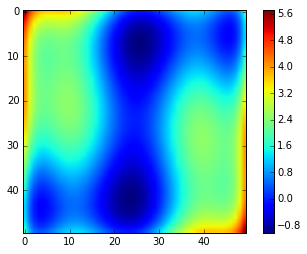

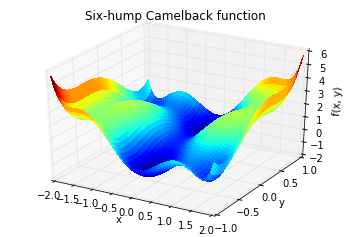

In [55]:
%matplotlib inline
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)
#print xg

pmin = np.array([-2,-1]) # mimimum bounds
pmax = np.array([2,1]) # maximum bounds
p_guess = (pmin + pmax)/2
print p_guess
bounds = np.c_[pmin, pmax] # [[pmin[0],pmax[0]], [pmin[1],pmax[1]]]
print bounds

#rranges = (slice(-2, 2, 0.25), slice(-1, 1, 0.25))
#xmin_global = optimize.brute(sixhump, (rranges))
#print xmin_global

xmin_global2 = optimize.brute(sixhump, bounds)
print ("Xmin_global2=", xmin_global2)
#xmin_local = optimize.fminbound(sixhump, (0, 0), 10) ==>  one variate, not multivariants
#print xmin_local
#root = optimize.fsolve(sixhump, 1)  # our initial guess is 1
#root2 = optimize.fsolve(sixhump, -2.5)
#from scipy.optimize import minimize

sol = minimize(sixhump, p_guess, bounds=bounds)
print(sol)
if not sol.success:
    raise RuntimeError("Failed to solve")
popt = sol.x
print popt
print "hello"


sol_bfgs= optimize.fmin_bfgs(sixhump, p_guess, )
print "SOL_BFGS Results %r",   (sol_bfgs)
print sol_bfgs

plt.figure()  # simple visualization for use in tutorial
plt.imshow(sixhump([xg, yg]))
plt.colorbar()
#plt.plot (sixhump(xmin_global),"bo")


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#surf = ax.scatter(xmin_global, sixhump(xmin_global), c='r', marker='v', s=500)
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1, cmap=plt.cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')


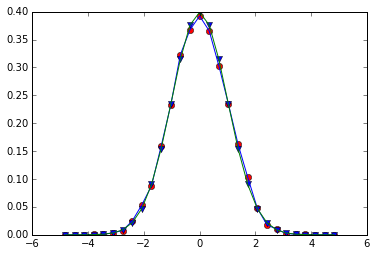

In [59]:
from scipy import stats
import numpy as np
import pylab as pl
a = np.random.normal(size=10000)
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(a, bins=bins, normed=True)
bins = 0.5*(bins[1:] + bins[:-1])
from scipy import stats
b = stats.norm.pdf(bins)
pl.plot(bins, histogram, "ro")
pl.plot(bins, b, "bv")
pl.plot(bins, histogram)
pl.plot(bins, b)

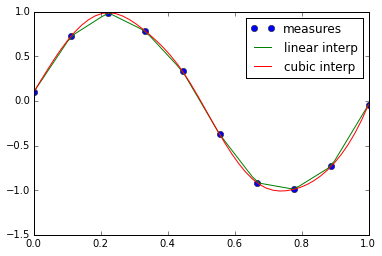

In [60]:
"""Generate the interpolation.png image for the interpolate
section of the Scipy tutorial
"""

import numpy as np
from scipy.interpolate import interp1d
import pylab as pl

measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

linear_interp = interp1d(measured_time, measures)
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

pl.plot(measured_time, measures, 'o', ms=6, label='measures')
pl.plot(computed_time, linear_results, label='linear interp')
pl.plot(computed_time, cubic_results, label='cubic interp')
pl.legend()

In [3]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import pylab as pl

max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

cprob = (np.arange(years_nb, dtype=np.float32) + 1)/(years_nb + 1)
sorted_max_speeds = np.sort(max_speeds)
speed_spline = UnivariateSpline(cprob, sorted_max_speeds)
nprob = np.linspace(0, 1, 1e2)
fitted_max_speeds = speed_spline(nprob)

fifty_prob = 1. - 0.02
fifty_wind = speed_spline(fifty_prob)

pl.figure()
pl.plot(sorted_max_speeds, cprob, 'o')
pl.plot(fitted_max_speeds, nprob, 'g--')
pl.plot([fifty_wind], [fifty_prob], 'o', ms=8., mfc='y', mec='y')
pl.text(30, 0.05, '$V_{50} = %.2f \, m/s$' % fifty_wind)
pl.plot([fifty_wind, fifty_wind], [pl.axis()[2], fifty_prob], 'k--')
pl.xlabel('Annual wind speed maxima [$m/s$]')
pl.ylabel('Cumulative probability')

IOError: [Errno 2] No such file or directory: 'max-speeds.npy'